In [1]:
#Import numpy/Pandas
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Import Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,5)
sns.set(context="paper", font="monospace")

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the file into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-points.csv', encoding = "ISO-8859-1")

In [3]:
#Creating a dataframe with contains Roger Federer match.
df = df[df['match_id'].str.contains("Roger_Federer")]

#Split the match_id on "-" and split the match id, First Player and Second Player name
df_new = df['match_id'].str.split("-")

In [5]:
#Create a rallyLen List from the dataframe. 
rallyLen = list(df['rallyLen'])

#Creating a First Player List which contain the name of the first player and storing into the dataframe.
firstPlayer = []
for i, player in enumerate(df_new):
    firstPlayer.append(player[4])

df['First Player'] = firstPlayer    

#Creating a Second Player List which contain the name of the second player and storing into the dataframe.
secondPlayer = []
for i, player in enumerate(df_new):
    secondPlayer.append(player[5])

df['Second Player'] = secondPlayer    
    
#Creating a matchIdList which contains each match id and storing into the dataframe.   
matchIdList = []
for i, Id in enumerate(df_new):
    matchIdList.append(Id[0])

df['MatchId'] = matchIdList

#Creating the Previous Rally Lenght list - Which contains the rally len of the previous rally. If it is a new match the previuos
#preivous rally lenght is 0. 
perviousRalleyLen = []
matchId = 0 
for i, Id in enumerate(matchIdList):
    j = i - 1
    if Id == matchId:
        perviousRalleyLen.append(rallyLen[j])
    else:
        perviousRalleyLen.append(0)
    matchId = Id
    
df['Pervious_Rally_Len'] = perviousRalleyLen

#Creating a dataFrame with Roger Feder is Serving.
df = df[df['Serving'].str.contains("RF")]

In [6]:
#Deuce - Right side of the court
deuceScores = ['0-0', '15-15', '30-0', '0-30', '40-15', '15-40', '40-40']
pts = list(df["Pts"])
isDueceCourt = []
for pt in pts:    
    if pt in deuceScores:
        isDueceCourt.append(1)
    else:
        isDueceCourt.append(0)

df["Is_Due_Court"] = isDueceCourt

In [7]:
#Creating a list PtWinner(Point Winner), FirstPlayer(First Player Name) and matchId(Match Id) List.
ptWinner = list(df["PtWinner"])
firstPlayer = list(df["First Player"])
matchIdList = list(df["MatchId"])

In [8]:
#Creating a Winner List which contains the name of player who won that Point. 
winnerList = []
for i, player in enumerate(firstPlayer):
    if firstPlayer == "Roger_Federer" and ptWinner[i] == 1:
        winnerList.append("RF")
    elif firstPlayer != "Roger_Federer" and ptWinner[i] == 2:
        winnerList.append("RF")
    else:
        winnerList.append("OPP")
        
winnerList2 = []
matchId = 0 
for i, Id in enumerate(matchIdList):
    j = i - 1
    if Id == matchId:
        winnerList2.append(winnerList[j])
    else:
        winnerList2.append("O")
    matchId = Id         

In [9]:
#Data type conversion
df['Gm2'] = df['Gm2'].apply(np.int64)
df["Winner"] = winnerList2
df['1st'] = df['1st'].str[0]
df['2nd'] = df['2nd'].str[0]

In [10]:
#Creating - GM_RF and GM_Opp
gm_rf = []
gm_opp = []
for index, row in df.iterrows():
    if row['First Player'] == 'Roger_Federer':
        gm_rf.append(row['Gm1'])
        gm_opp.append(row['Gm2'])
    else:
        gm_rf.append(row['Gm2'])
        gm_opp.append(row['Gm1'])

In [11]:
df['Gm_RF'] = gm_rf
df['Gm_Opp'] = gm_opp

In [12]:
#Creating Set_RF and Set_Opp
set_rf = []
set_opp = []
for index, row in df.iterrows():
    if row['First Player'] == 'Roger_Federer':
        set_rf.append(row['Set1'])
        set_opp.append(row['Set2'])
    else:
        set_rf.append(row['Set2'])
        set_opp.append(row['Set1'])

In [13]:
df['Set_RF'] = set_rf
df['Set_Opp'] = set_opp
df_pts = df['Pts'].str.split("-")

In [14]:
#Points - Rafael Federer
pts_rf = []

for pt in df_pts:
    pt_rf = pt[0]
    
    if pt_rf == "AD":
        pts_rf.append("50")
    else:
        pts_rf.append(pt_rf)

df['Pts_RF'] = pts_rf

#Points - Opposite Player
pts_opp = []

for pt in df_pts:
    pt_opp = pt[1]
    
    if pt_opp == "AD":
        pts_opp.append("50")
    else:
        pts_opp.append(pt_opp)
        
df['Pts_Opp'] = pts_opp    

In [15]:
#Creating a dataframe with important features
df = df[['Set_RF', 'Set_Opp', 'Gm_RF', 'Gm_Opp','Pts_RF', 'Pts_Opp', '1st', 'Pervious_Rally_Len', 'Winner', 'Is_Due_Court']]

In [16]:
#Data type conversion
df = df[df['1st'].apply(lambda x: x.isnumeric())]
df = df[df['Pts_Opp'].apply(lambda x: x.isnumeric())]
df = df.reset_index()
df = df.drop(['index'], axis = 1)

In [17]:
#Data type conversion
df['Gm_RF'] = df['Gm_RF'].apply(np.int64)
df['Gm_Opp'] = df['Gm_Opp'].apply(np.int64)
df['Pts_RF'] = df['Pts_RF'].apply(np.int64)
df['Pts_Opp'] = df['Pts_Opp'].apply(np.int64)
df['Pervious_Rally_Len'] = df['Pervious_Rally_Len'].apply(np.int64)
df['Winner'] = pd.factorize(df['Winner'])[0] + 1
df["Serve"] = df["1st"]
df = df.drop('1st', axis = 1)
df["Serve"] = df ["Serve"].apply(np.int64)

In [18]:
df.head(n = 5)

,Set_RF,Set_Opp,Gm_RF,Gm_Opp,Pts_RF,Pts_Opp,Pervious_Rally_Len,Winner,Is_Due_Court,Serve
0,0,0,0,1,0,0,3,1,1,4
1,0,0,0,1,15,0,0,2,0,4
2,0,0,0,1,15,15,6,3,1,4
3,0,0,0,1,30,15,3,2,0,4
4,0,0,0,1,30,30,4,3,0,4


In [19]:
#Remove outlier by taking only 4, 5 and 6 in y(Predictor variable).
df = df[df.Serve > 3]

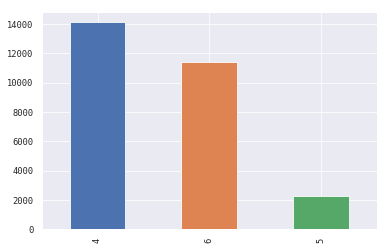

In [32]:
#Countind the Different Serve type
pd.value_counts(df['Serve']).plot.bar()

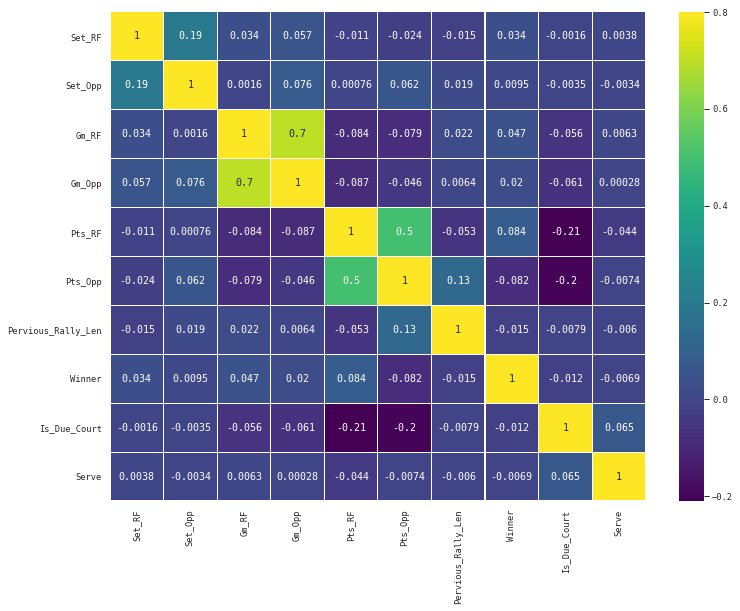

In [33]:
#Heat Map to see the correlation between diffrent variables
#Find the correlation between the different varaibles in the datasets
cormat = df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(12, 9))

#Draw the heatmap using seaborn
colormap = plt.cm.viridis
sns.heatmap(cormat, linewidths=0.1, cmap = colormap, 
            linecolor = 'White', vmax=0.8, annot=True)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer

In [35]:
#Split the data into predictor variable and target variable
X = df.drop('Serve', axis = 1).values
y = df['Serve'].values

In [36]:
#Split the data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [37]:
#KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train)* 100, 2)
print("KNeighbours Classifier is %2.2f" %acc_knn)

KNeighbours Classifier is 67.76


In [38]:
#Descicion Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train)*100, 2)
print("Decision Tree is %2.2f" %acc_decision_tree)

Decision Tree is 85.17


In [39]:
#Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train)*100, 2)
print("Random Forest Classifier is %2.2f" %acc_random_forest)

Random Forest Classifier is 85.17


In [40]:
#Testing - TestCase1 - Output - 4
x_test = np.array([0, 0, 0, 1, 30, 15, 3, 2, 0]).reshape(1, -1)
y_pred_test = random_forest.predict(x_test)
print(y_pred_test)

[4]


In [41]:
#Testing - TestCase2 - Output - 6
x_test_1 = np.array([0, 1, 2, 2, 0, 40, 2, 3, 0]).reshape(1, -1)
y_pred_test = random_forest.predict(x_test_1)
print(y_pred_test)

[6]
